<h1>Language Processing</h1>
<p>Case Study 2 - Prática de análise de dados feita com o curso Python for Research.</p>
<p>Graças ao <b>Project Gutenberg</b>(além de ser a biblioteca digital mais antiga do mundo, é um projeto com o objetivo de conservar diversos conteúdos digitais que são de dominio publico) foi possivel ter acesso a 102 livros nas linguas Inglês, Francês, Alemão e Português de diversos autores. E com esses livros fizemos nossas práticas de limpeza de dados e visualização de dados.</p>

<h3>Função 'count_word'</h3>
<p>Função criada para contar a quantidade de palavras individuais que tem no livro e a quatidade de vezes em que elas são repetidas.</p>
<p>Amarzenado cada uma e suas quantidades em um dicionario. E, antes disso, remove no texto os sinais que não devem ser contados como palavras.</p>

In [2]:

def count_word(text):
    word_count = {}
    text = text.lower()
    for skip in [".", ",", ";", "'", '"']:
        text = text.replace(skip, "")
        
        
    for word in text.split(" "):
        if word.lower() in word_count:
            word_count[word.lower()] += 1
            
        else:
            word_count[word.lower()] = 1
    return word_count



<h2>Importando as bibliotecas necessárias e uma segunda versão da função 'count_word'</h2>
<p>Foram importadas as bibliotecas Collections, Pandas e MatPlotLib.</p>
<p>Através da função Counter foi desenvolvida uma função menos "verbosa" e mais rápida.</p>


In [25]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


def count_word_fast(text):
    text = text.lower()
    word_count = {}
    listo = [".", ",", ";", "'", '"', ":"]
    for skip in listo:
        text = text.replace(skip, "")
        
        
    word_count = Counter(text.split(" "))
    return word_count



<h2>Criação da função 'read_book'</h2>
<p>A função tem como único parâmetro o path do livro. Após receber o path ela abre o arquivo de texto para ser lido pelo algoritmo e remove os "\n" e "\r" do arquivo.</p>

In [5]:


def read_book(title_path):
    with open(title_path, "r", encoding = "utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text




<h2>Função 'word_stats'</h2>
<p>A função recebe o dicionário criado pela outra função 'word_count' e devolve os dados desse dicionário, como, quantidade de palavras e uma lista com os valores</p>

In [50]:
def word_stats(word_count):
    num_unique = len(word_count)
    counts = word_count.values()
    return (num_unique, counts)




<h2>Criação da função 'stats' e importação da biblioteca 'OS'</h2>
<p>Apenas recebendo o nome da pasta onde estão todos os livros, a função 'stats', utilizando a biblioteca 'os' para listar cada item que está dentro das outras pastas, consegue formar um path para cada livro(na variável "inputfile"). Esse path é passado para função 'read_book' que, na variável 'text', vai armazenar o texto do livro já limpo e, em seguida, passa o texto para a função 'count_word' que vai passar o seu retorno, ou seja, o dicionário para a função word_stats que irá armazenar o seu retorno nas variaveis 'num_unique' e 'counts'(numero de palavras unicas e quantas vezes são repetidas).</p>
<p>Antes dos 3 for loops que geram o path foi criada uma tabela com 5 colunas utilizando a biblioteca 'Pandas' e sua função 'DataFrame'. Ao fim do ultimo for loop é preenchida com cada um dos dados de cada livro e retornada.</p>

In [38]:
import os
book_dir = "./Books"
def stats(path):
    i = 0
    stats = pd.DataFrame(columns = ("Title", "Author", "Language", "Length", "Uniques"))
    for language in os.listdir(book_dir):
        for author in os.listdir(book_dir + "/" + language):
            for title in os.listdir(book_dir + "/" + language + "/" + author):
                inputfile = book_dir + "/" + language + "/" + author + "/" + title
                
                text =  read_book(inputfile)
                (num_unique, counts) = word_stats(count_word(text))
                i += 1
                
                stats.loc[i] = title.replace(".txt", ""), author.capitalize(), language, len(text), num_unique
               
    return stats

status = stats(book_dir)
                

<h2>Criação do gráfico utilizando a biblioteca MatPlotLib.Pyplot</h2>
<p>Aqui foi gerado um gráfico onde é exibido, por quantidade de palavras, qual livro e de qual lingua possui a maior quantidade de palavras individuais.</p>

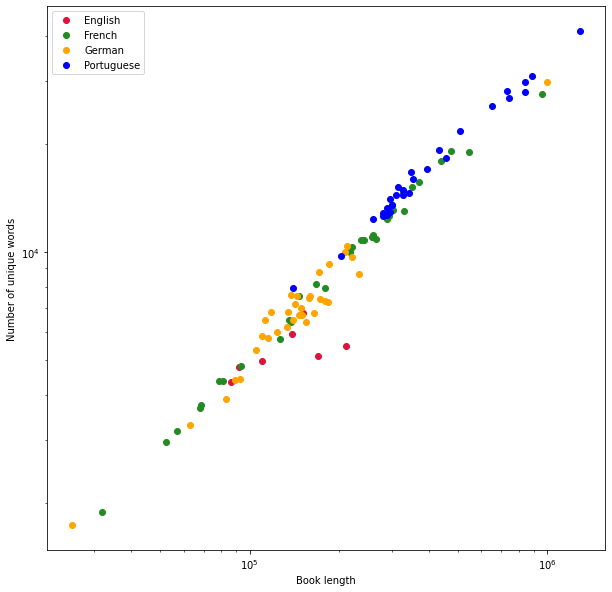

In [48]:
plt.figure(figsize = (10, 10))
subset = status[status.Language == "English"]
plt.loglog(subset.Length, subset.Uniques, "o", label = "English", color = "crimson")

subset = status[status.Language == "French"]
plt.loglog(subset.Length, subset.Uniques, "o", label = "French", color = "forestgreen")

subset = status[status.Language == "German"]
plt.loglog(subset.Length, subset.Uniques, "o", label = "German", color = "orange")

subset = status[status.Language == "Portuguese"]
plt.loglog(subset.Length, subset.Uniques, "o", label = "Portuguese", color = "blue")

plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("LanguageProcess.jpeg")